In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('./dataset/Twitter_Data.csv')

#drop nan values
dataset = dataset.dropna()

#drop duplicates

dataset = dataset.drop_duplicates()

#transform the sentiment to text
dataset['category'] = dataset['category'].map({-1:'Negative', 1:'Positive', 0:'Neutral'})

#get dummy variables

dataset = pd.get_dummies(dataset, columns=['category'])

x = dataset["clean_text"]

y = dataset.drop(['clean_text'], axis=1)

x = x.to_numpy(dtype="<U43")

y = y.to_numpy()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(x_train)


vocab = np.array(encoder.get_vocabulary())
vocab[:20]


model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [11]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,epochs=20)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 3)).


In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

1019/1019 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.3385
Test Loss: nan
Test Accuracy: 0.3385078012943268


In [77]:
#save the model

model.save('model1', save_format="tf")

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [8]:
model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,epochs=20)

test_loss2, test_acc2 = model2.evaluate(x_test, y_test)

print('Test Loss:', test_loss2)
print('Test Accuracy:', test_acc2)

Epoch 1/20


c:\Users\heito\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4075/4075 [==============================] - 38s 9ms/step - loss: 0.9508 - accuracy: 0.5305
Epoch 2/20
4075/4075 [==============================] - 37s 9ms/step - loss: 0.8480 - accuracy: 0.5978
Epoch 3/20
4075/4075 [==============================] - 37s 9ms/step - loss: 0.8307 - accuracy: 0.6029
Epoch 4/20
4075/4075 [==============================] - 36s 9ms/step - loss: 0.8242 - accuracy: 0.6043
Epoch 5/20
4075/4075 [==============================] - 36s 9ms/step - loss: 0.8203 - accuracy: 0.6062
Epoch 6/20
4075/4075 [==============================] - 36s 9ms/step - loss: 0.8167 - accuracy: 0.6070
Epoch 7/20
4075/4075 [==============================] - 36s 9ms/step - loss: 0.8139 - accuracy: 0.6079
Epoch 8/20
4075/4075 [==============================] - 37s 9ms/step - loss: 0.8116 - accuracy: 0.6086
Epoch 9/20
4075/4075 [==============================] - 37s 9ms/step - loss: 0.8094 - accuracy: 0.6094
Epoch 10/20
4075/4075 [==============================] - 39s 9ms/step - loss: 0.8071

In [9]:
#save the model

model2.save('model2', save_format="tf")

INFO:tensorflow:Assets written to: model2\assets


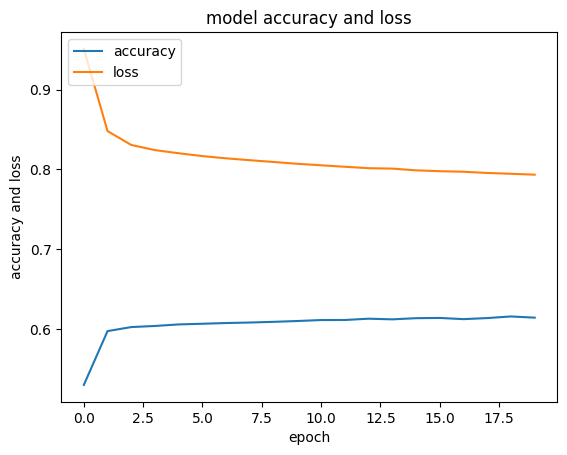

In [13]:
#plot model 2

import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()